In [1]:
import pandas as pd

In [2]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [9]:
data=pd.read_csv('Heart_Disease_Prediction.csv')

In [10]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [13]:
data.shape

(270, 14)

In [15]:
data.mean()

C:\Users\TANUKE~1\AppData\Local\Temp/ipykernel_25872/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Age                         54.433333
Sex                          0.677778
Chest pain type              3.174074
BP                         131.344444
Cholesterol                249.659259
FBS over 120                 0.148148
EKG results                  1.022222
Max HR                     149.677778
Exercise angina              0.329630
ST depression                1.050000
Slope of ST                  1.585185
Number of vessels fluro      0.670370
Thallium                     4.696296
dtype: float64

In [17]:
data.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [18]:
categorical_values = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

Age : [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Sex : [1 0]
Chest pain type : [4 3 2 1]
BP : [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Cholesterol : [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
FBS over 120 : [0 1]
EKG results

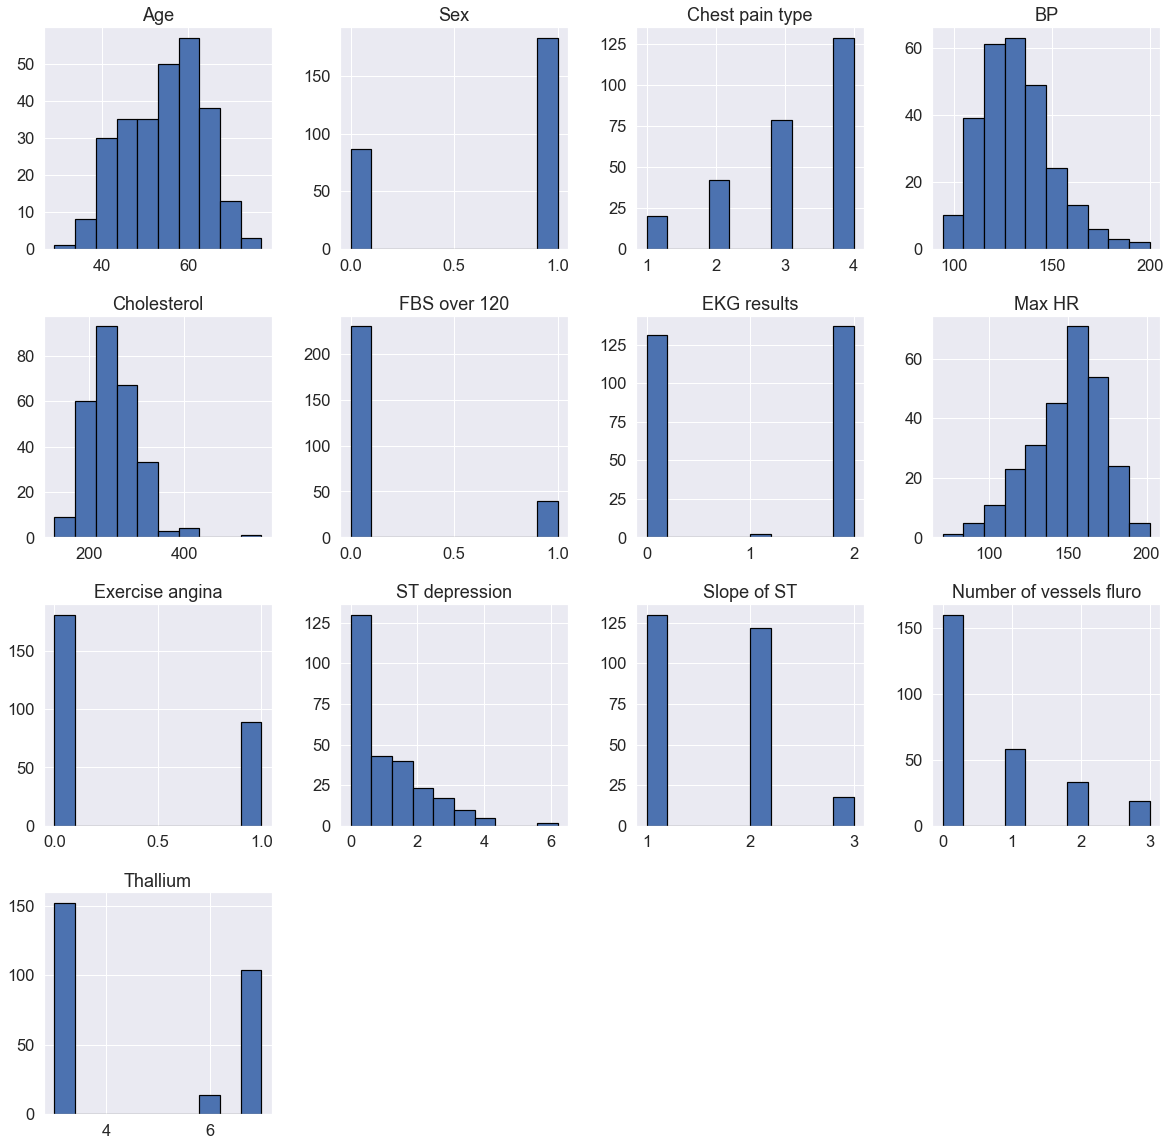

In [19]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

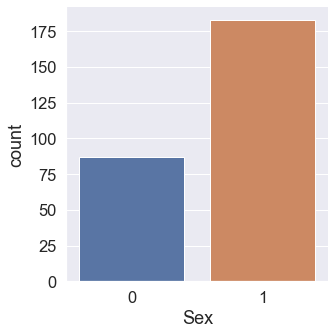

In [21]:
sns.factorplot('Sex', data=data, kind='count')


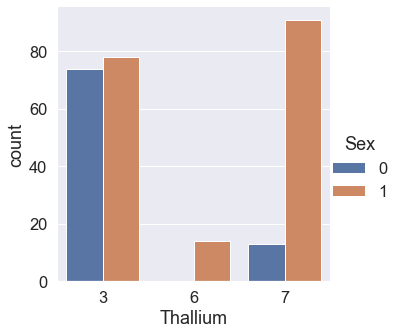

In [23]:
sns.factorplot('Thallium', data=data, hue='Sex', kind='count')

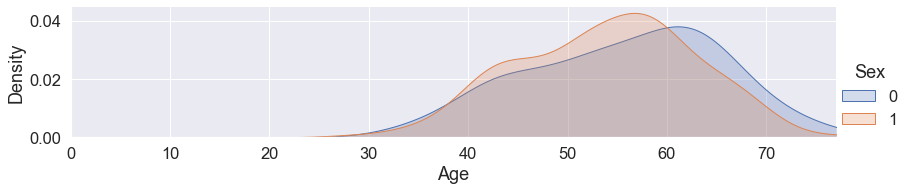

In [27]:
fig = sns.FacetGrid(data, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()


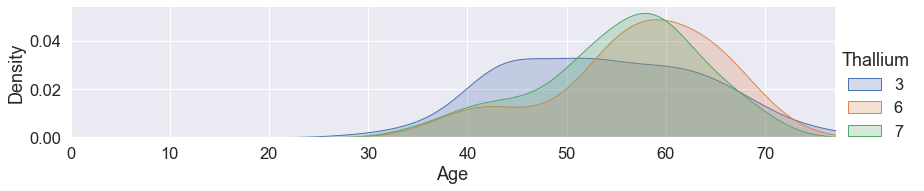

In [28]:
fig = sns.FacetGrid(data, hue="Thallium", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

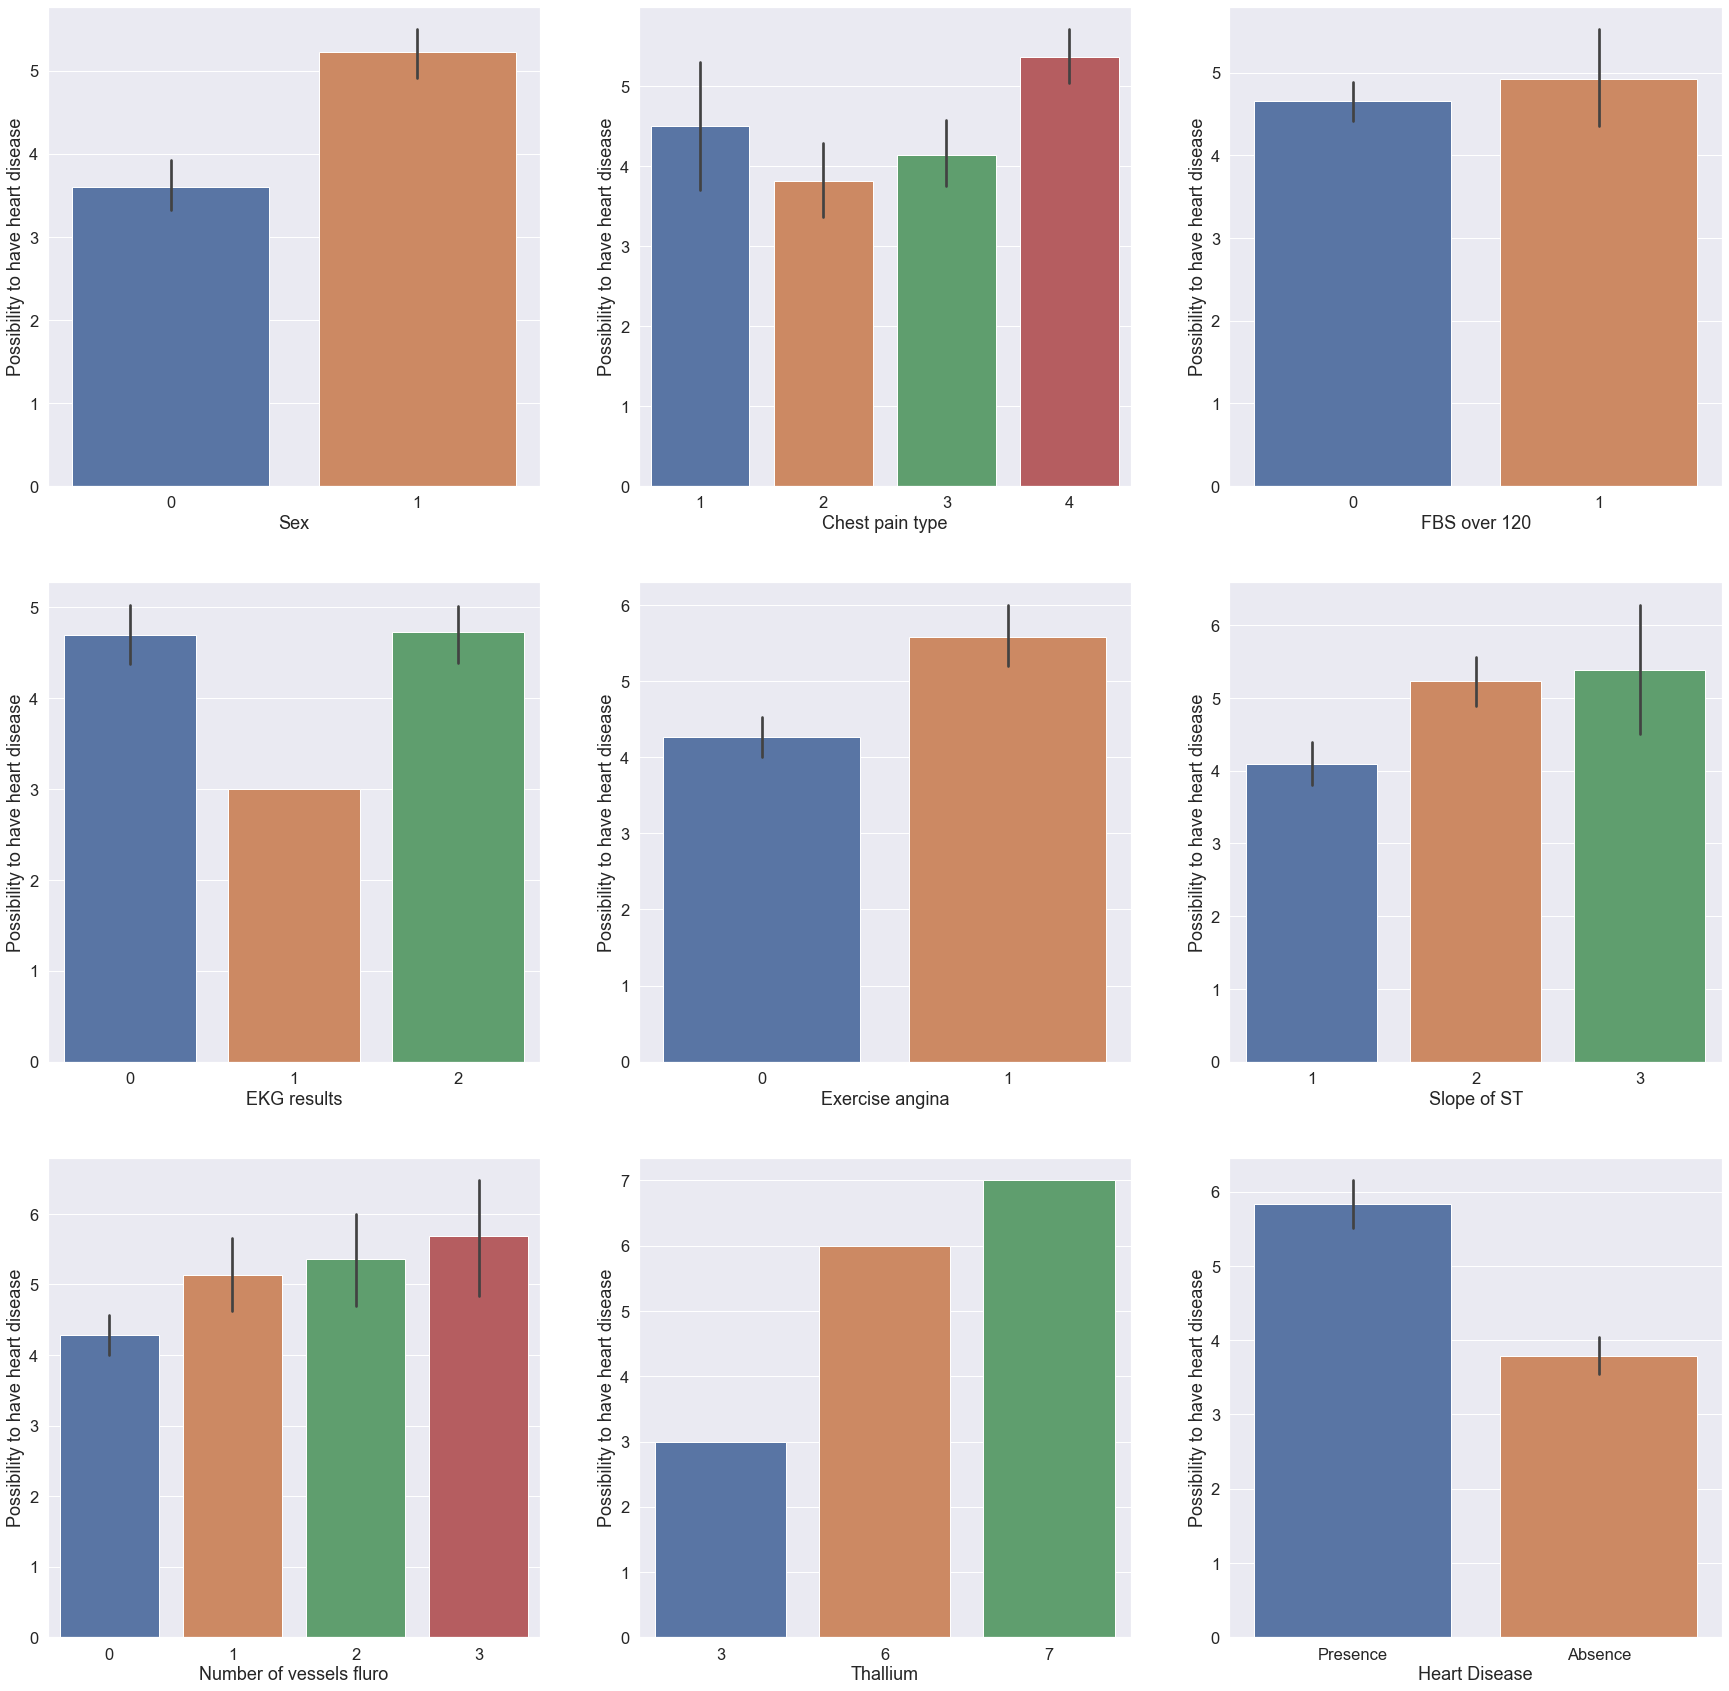

In [29]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='Thallium', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

<AxesSubplot:>

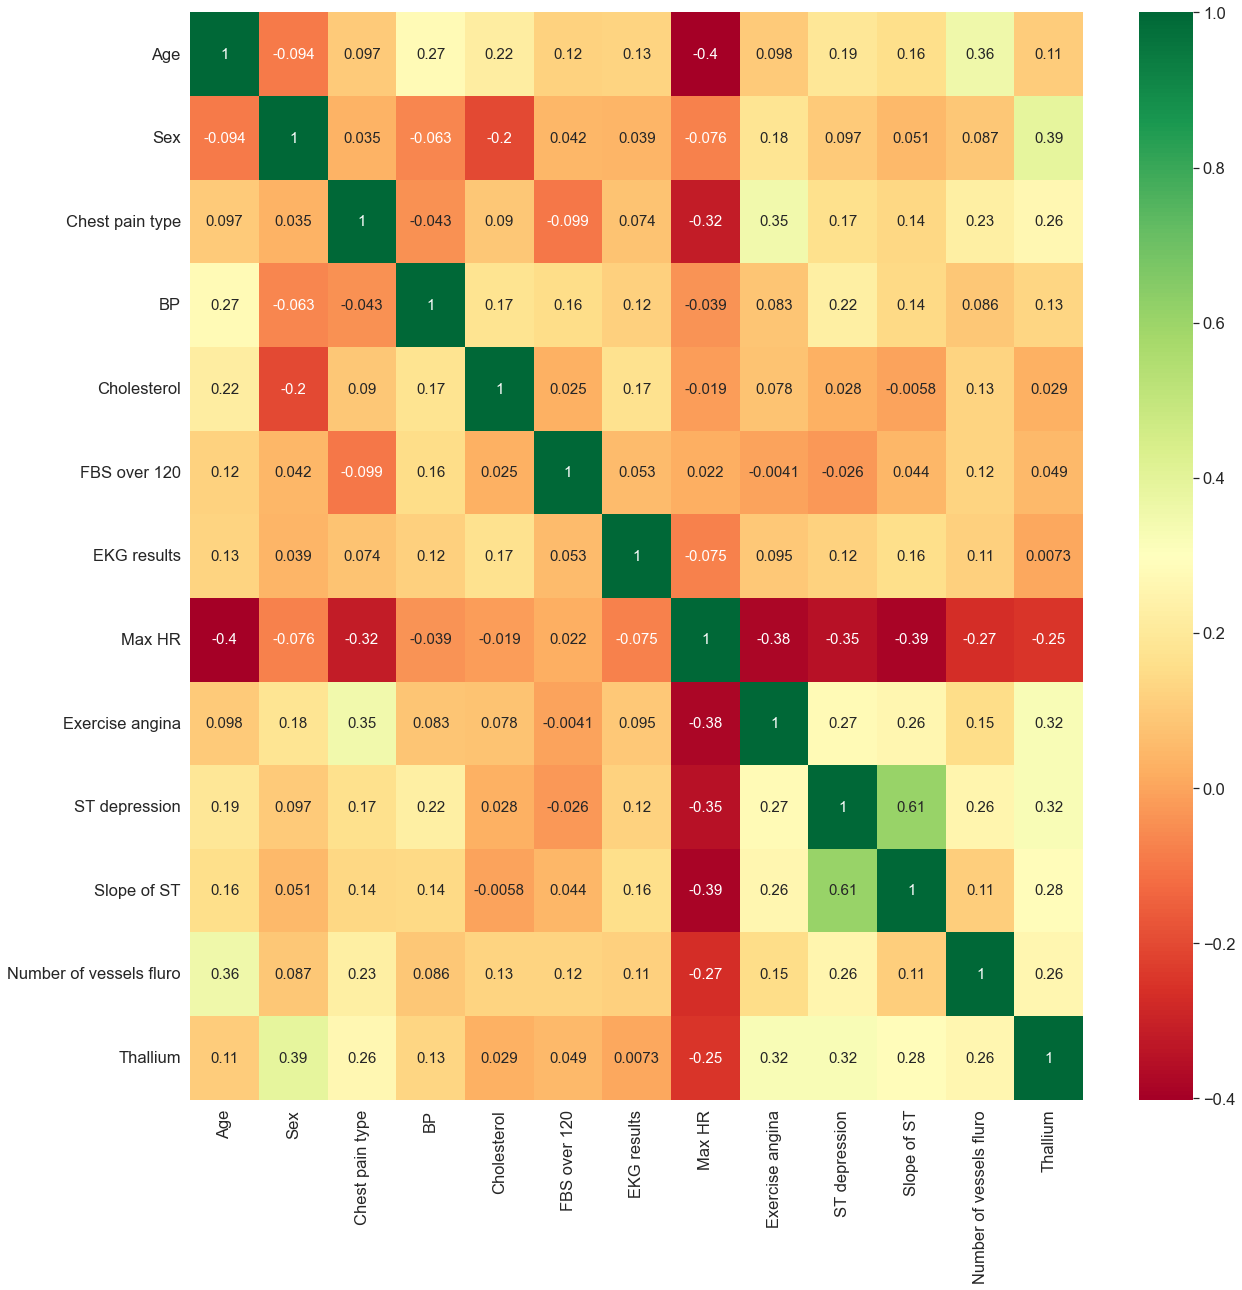

In [30]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [35]:
df = data.dropna()
df = df.drop(columns = ['FBS over 120'])
df = df.rename(columns = {'age': 'age', 'sex': 'gender', 'cp': 'chest pain', 'trestbps': 'blood pressure', 'chol': 'cholestrol level', 'thalach': 'max heart rate', })
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,2,121,1,0.2,1,1,3,Absence


In [31]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [36]:
df = shuffle(df)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1],random_state=42, test_size=0.05)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
train_acc=[]
test_acc=[]

for k in range(1,31):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    # training time accuracy
    train_acc.append(model.score(x_train,y_train))
    # test time accuracy
    test_acc.append(model.score(x_test,y_test))

In [39]:
train_acc

[1.0,
 0.76953125,
 0.7890625,
 0.765625,
 0.76953125,
 0.75390625,
 0.7578125,
 0.74609375,
 0.7421875,
 0.734375,
 0.70703125,
 0.71484375,
 0.7109375,
 0.703125,
 0.69921875,
 0.6875,
 0.6953125,
 0.69921875,
 0.70703125,
 0.70703125,
 0.71875,
 0.70703125,
 0.72265625,
 0.734375,
 0.72265625,
 0.71484375,
 0.703125,
 0.70703125,
 0.6953125,
 0.71484375]

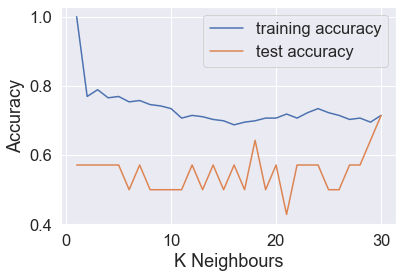

In [40]:
plt.plot(range(1,31), train_acc,label="training accuracy")
plt.plot(range(1,31),test_acc,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K Neighbours")
plt.legend()
plt.savefig("KNN Comparison Models")

In [41]:
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
train_accuracy=knn_model.score(x_train,y_train)
test_accuracy=knn_model.score(x_test,y_test)
print("Accuracy in Training: ",train_accuracy)
print("Accuracy in testing: ", test_accuracy)

Accuracy in Training:  0.71484375
Accuracy in testing:  0.7142857142857143


In [42]:
x_train.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print("Training Acc: ",dt_model.score(x_train, y_train))
print("Test Acc: ",dt_model.score(x_test, y_test))

Training Acc:  1.0
Test Acc:  0.7142857142857143


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train, y_train)
print("Training Acc: ",dt_model.score(x_train, y_train))
print("Test Acc: ",dt_model.score(x_test, y_test))

Training Acc:  0.91796875
Test Acc:  0.8571428571428571


In [46]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=42)
nn_model.fit(x_train, y_train)
print("Training Acc: ",nn_model.score(x_train, y_train))
print("Test Acc: ",nn_model.score(x_test, y_test))

Training Acc:  0.875
Test Acc:  0.7142857142857143


C:\Users\tanu kesharwani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.fit_transform(x_test)

nn_model1 = MLPClassifier(random_state=42)
nn_model1.fit(xtrain_scaled, y_train)
print("Training Acc: ",nn_model1.score(xtrain_scaled, y_train))
print("Test Acc: ",nn_model1.score(xtest_scaled, y_test))

Training Acc:  0.90625
Test Acc:  0.7142857142857143


C:\Users\tanu kesharwani\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
nn_model.coefs_

[array([[-2.87386332e-06,  1.79632038e-01,  7.90656162e-04, ...,
         -1.84948116e-10, -2.49126303e-01, -2.10878170e-01],
        [-2.55020060e-02,  1.69935416e-01, -1.53613994e-04, ...,
          1.35186451e-02,  2.89621417e-01,  2.36472540e-01],
        [ 1.25711952e-05, -1.39906658e-01, -6.65289893e-03, ...,
         -2.71276696e-03,  1.11200209e-01, -1.39569794e-01],
        ...,
        [-3.15470513e-03, -2.08444980e-01, -4.95604639e-03, ...,
         -9.21592934e-03,  2.19034464e-01, -1.46738864e-02],
        [-4.67287527e-03,  1.29545667e-01,  1.03598309e-02, ...,
         -4.57538915e-03,  2.45889374e-01,  4.20660387e-02],
        [-2.06276931e-02,  2.92055767e-01,  1.17192532e-02, ...,
          2.55615995e-02,  1.93293514e-01, -9.63275200e-02]]),
 array([[-3.05016021e-02],
        [ 1.98055055e-01],
        [-2.61312572e-02],
        [ 8.18239635e-03],
        [ 5.53784394e-04],
        [ 1.67927227e-01],
        [ 6.52162505e-04],
        [ 4.89155066e-03],
        [-9.1

In [50]:
nn_model1.coefs_

[array([[-0.06205473,  0.26268333,  0.181258  , ...,  0.03258414,
         -0.2858452 , -0.17101382],
        [-0.2988142 ,  0.02336196, -0.28756239, ...,  0.17458711,
          0.25552192,  0.24234965],
        [-0.0274675 , -0.19943286, -0.17951941, ..., -0.15903981,
          0.13008211, -0.19257071],
        ...,
        [-0.15370392, -0.19003588, -0.24227181, ..., -0.11133301,
          0.18855678,  0.05488482],
        [-0.32462669,  0.0162781 ,  0.18517663, ..., -0.39344388,
          0.15801977, -0.00999464],
        [-0.24064238,  0.18493118,  0.16374818, ...,  0.08783939,
          0.2755497 , -0.15329158]]),
 array([[-0.34590743],
        [ 0.33732045],
        [-0.43058602],
        [ 0.1462054 ],
        [ 0.2150225 ],
        [ 0.18030957],
        [ 0.23719324],
        [ 0.25345561],
        [-0.20334569],
        [ 0.09855334],
        [-0.27255222],
        [ 0.23208135],
        [ 0.21138165],
        [ 0.26889925],
        [-0.15525934],
        [ 0.26022491],
     

In [51]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

C:\Users\tanu kesharwani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
print("Training Acc: ",lr_model.score(x_train, y_train))
print("Test Acc: ",lr_model.score(x_test, y_test))

Training Acc:  0.8671875
Test Acc:  0.6428571428571429


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
print("Training Acc: ",rf_model.score(x_train, y_train))
print("Test Acc: ",rf_model.score(x_test, y_test))

Training Acc:  1.0
Test Acc:  0.8571428571428571


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report

In [56]:
print (" Confusion Matrix for Logistic Regression: ")
lr_conf_mat = confusion_matrix(y_test,lr_model.predict(x_test))
print (lr_conf_mat)
print (" Confusion Matrix for Decision Tree: ")
dt_conf_mat = confusion_matrix(y_test,dt_model.predict(x_test))
print (dt_conf_mat)
print (" Confusion Matrix for Random Forest: ")
rf_conf_mat = confusion_matrix(y_test,rf_model.predict(x_test))
print (rf_conf_mat)
print (" Confusion Matrix for KNN: ")
knn_conf_mat = confusion_matrix(y_test,knn_model.predict(x_test))
print (knn_conf_mat)
print (" Confusion Matrix for MLP: ")
nn_conf_mat = confusion_matrix(y_test,nn_model.predict(x_test))
print (nn_conf_mat)

 Confusion Matrix for Logistic Regression: 
[[5 2]
 [3 4]]
 Confusion Matrix for Decision Tree: 
[[6 1]
 [1 6]]
 Confusion Matrix for Random Forest: 
[[6 1]
 [1 6]]
 Confusion Matrix for KNN: 
[[5 2]
 [2 5]]
 Confusion Matrix for MLP: 
[[6 1]
 [3 4]]


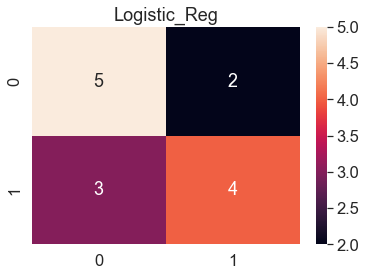

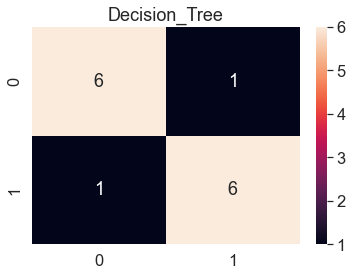

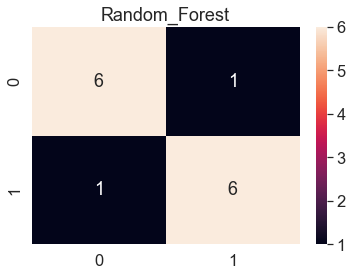

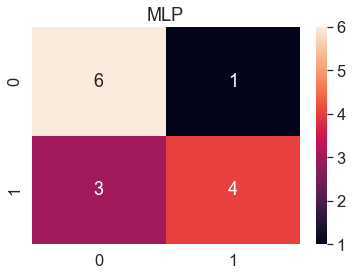

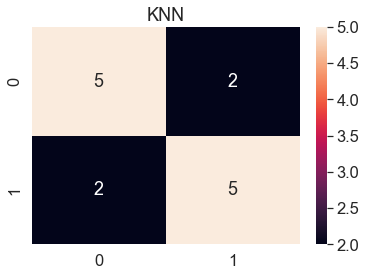

In [57]:
conf_mat_final = { 'Logistic_Reg': lr_conf_mat , 'Decision_Tree': dt_conf_mat, 'Random_Forest': rf_conf_mat, 'MLP': nn_conf_mat, 'KNN': knn_conf_mat}
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [58]:
print (" classification report for Logistic Regression: ")
print (classification_report(y_test,lr_model.predict(x_test)))
print (" classification report for Decision Tree: ")
print (classification_report(y_test,dt_model.predict(x_test)))
print (" classification report for Random Forest: ")
print (classification_report(y_test,rf_model.predict(x_test)))
print (" classification report for KNN: ")
print (classification_report(y_test,knn_model.predict(x_test)))
print (" classification report for MLP: ")
print (classification_report(y_test,nn_model.predict(x_test)))

 classification report for Logistic Regression: 
              precision    recall  f1-score   support

     Absence       0.62      0.71      0.67         7
    Presence       0.67      0.57      0.62         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14

 classification report for Decision Tree: 
              precision    recall  f1-score   support

     Absence       0.86      0.86      0.86         7
    Presence       0.86      0.86      0.86         7

    accuracy                           0.86        14
   macro avg       0.86      0.86      0.86        14
weighted avg       0.86      0.86      0.86        14

 classification report for Random Forest: 
              precision    recall  f1-score   support

     Absence       0.86      0.86      0.86         7
    Presence       0.86      0.86      0.86         7

    accuracy                           0.86    

In [59]:
lr_acc = accuracy_score (y_test, lr_model.predict(x_test))
print ("Accuracy for Logistic Regression Model: ")
lr_acc

Accuracy for Logistic Regression Model: 


0.6428571428571429

In [60]:
dt_acc = accuracy_score (y_test, dt_model.predict(x_test))
print ("Accuracy for Decision Tree Model: ")
dt_acc

Accuracy for Decision Tree Model: 


0.8571428571428571

In [61]:
nn_acc = accuracy_score (y_test, nn_model.predict(x_test))
print ("Accuracy for MLP Model: ")
nn_acc

Accuracy for MLP Model: 


0.7142857142857143

In [62]:
knn_acc = accuracy_score (y_test, knn_model.predict(x_test))
print ("Accuracy for KNN Model: ")
knn_acc

Accuracy for KNN Model: 


0.7142857142857143

In [63]:
rf_acc = accuracy_score (y_test, rf_model.predict(x_test))
print ("Accuracy for Random Forest Model: ")
rf_acc

Accuracy for Random Forest Model: 


0.8571428571428571

In [64]:
score = { 'Logistic_Reg': [lr_acc] , 'Decision_Tree': [dt_acc], 'Random_Forest': [rf_acc], 'MLP': [nn_acc], 'KNN': [knn_acc]}
score_df = pd.DataFrame(score)
score_df

,Logistic_Reg,Decision_Tree,Random_Forest,MLP,KNN
0,0.642857,0.857143,0.857143,0.714286,0.714286
